<a href="https://colab.research.google.com/github/Nabil-07/TSF_GRIP_EDA_SPORT-IPL-/blob/main/GRIP_EDA_IPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

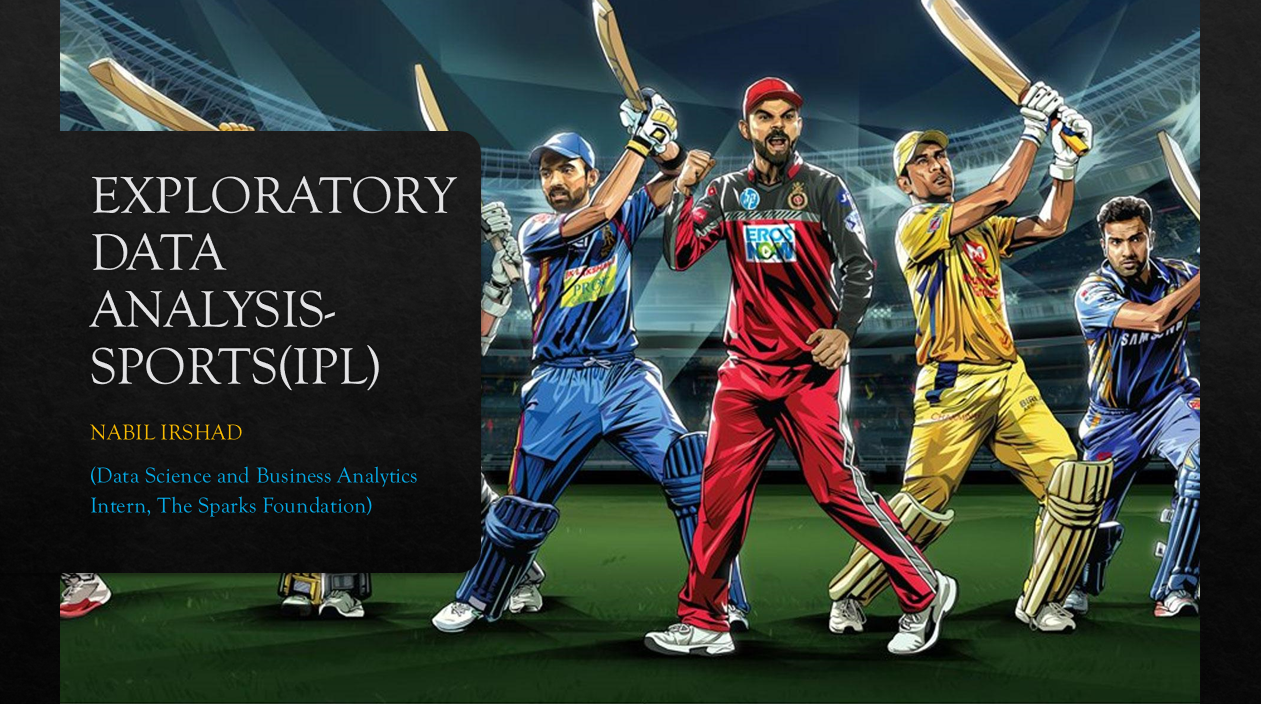

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

!pip install pandas-stubs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 147 kB 4.8 MB/s 


In [ ]:
matches=pd.read_csv("/content/drive/MyDrive/GRIP_IPL_CSV/match.csv")
all_deliveries=pd.read_csv("/content/drive/MyDrive/GRIP_IPL_CSV/deliveries.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print("Teams:\n",(matches["team1"]).unique())

Teams:
 ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']


In [ ]:

#Data Cleaning
matches["team1"].replace({"Rising Pune Supergiant": "Rising Pune Supergiants", "Delhi Capitals": "Delhi Daredevils", "Sunrisers Hyderabad": "SunRisers Hyderabad", "Pune Warriors":"Pune Warriors India"}, inplace=True)
matches["team2"].replace({"Rising Pune Supergiant": "Rising Pune Supergiants", "Delhi Capitals": "Delhi Daredevils", "Sunrisers Hyderabad": "SunRisers Hyderabad", "Pune Warriors":"Pune Warriors India"}, inplace=True)
matches["winner"].replace({"Rising Pune Supergiant": "Rising Pune Supergiants", "Delhi Capitals": "Delhi Daredevils", "Sunrisers Hyderabad": "SunRisers Hyderabad", "Pune Warriors":"Pune Warriors India"}, inplace=True)
matches["toss_winner"].replace({"Rising Pune Supergiant": "Rising Pune Supergiants", "Delhi Capitals": "Delhi Daredevils", "Sunrisers Hyderabad": "SunRisers Hyderabad", "Pune Warriors":"Pune Warriors India"}, inplace=True)
teams=matches["team1"].unique()
teams.sort()
#To consider only the main 8 teams, uncomment the next line:
#teams=["Chennai Super Kings","Delhi Daredevils","Kings XI Punjab","Kolkata Knight Riders","Mumbai Indians","Rajasthan Royals","Royal Challengers Bangalore","SunRisers Hyderabad"]
print("Teams:\n",(teams))

Teams:
 ['Chennai Super Kings' 'Deccan Chargers' 'Delhi Daredevils'
 'Gujarat Lions' 'Kings XI Punjab' 'Kochi Tuskers Kerala'
 'Kolkata Knight Riders' 'Mumbai Indians' 'Pune Warriors India'
 'Rajasthan Royals' 'Rising Pune Supergiants'
 'Royal Challengers Bangalore' 'SunRisers Hyderabad']


In [ ]:
#Assign Short-Forms of Teams
teams_1=[]
for i in teams:
    teams_1.append(''.join([c for c in i if c.isupper()]))
print(teams_1)

['CSK', 'DC', 'DD', 'GL', 'KXIP', 'KTK', 'KKR', 'MI', 'PWI', 'RR', 'RPS', 'RCB', 'SRH']


In [ ]:
#Assigning Colors to Teams
if len(teams_1)==8:
  cols=['#F9CD05','#282968','#DC143C','#3A225D','#004BA0','#FFC0CB','#FF0000','#FF822A']
  edge=['#1D418C','#C02826','#A7A9AC','#B3A123','#D1AB3E','#254AA5','#000000','#000000']
else:
  cols=['#F9CD05','#366293','#282968','#E04F16','#DC143C','#FF4500','#3A225D','#004BA0','#2F9BE3','#FFC0CB','#D11D9B','#FF0000','#FF822A']
  edge=['#1D418C','#D9E3EF','#C02826','#18089C','#A7A9AC','#7F3F98','#B3A123','#D1AB3E','#C0D6EB','#254AA5','#FF8209','#000000','#000000']

In [ ]:

#Finding the most successful team
winners=matches[matches["season"].diff(-1)!=0].sort_values(by="season")
trophies_won=[]
for i in teams:
  trophies_won.append(winners["winner"].str.count(i).sum())
print(trophies_won)

[3, 1, 0, 0, 0, 0, 2, 4, 0, 1, 0, 0, 1]


In [ ]:
#Most Successful Team in terms of Trophies Won
success=dict(zip(teams,trophies_won))
success=dict(sorted(success.items(), key=lambda x: x[1], reverse=True))
print("Trophies Won by Teams:")
print("{:<30} {:<30}".format('TEAM', 'TROPHIES'))
for key, value in success.items():
  if value!=0:
    print("{:<30} {:<30}".format(key, value))

Trophies Won by Teams:
TEAM                           TROPHIES                      
Mumbai Indians                 4                             
Chennai Super Kings            3                             
Kolkata Knight Riders          2                             
Deccan Chargers                1                             
Rajasthan Royals               1                             
SunRisers Hyderabad            1                             


<BarContainer object of 13 artists>

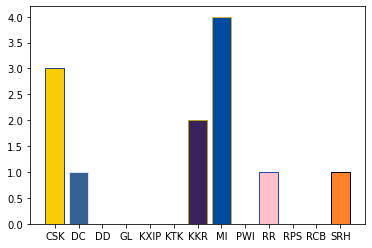

In [ ]:

plt.bar(teams_1,trophies_won,color=cols,edgecolor=edge)

In [ ]:
successful=next(iter((success.items())))
print("The Most Successful Team is **"+successful[0]+"**\nThey have won "+str(successful[1])+" IPL trophies.")

The Most Successful Team is **Mumbai Indians**
They have won 4 IPL trophies.


In [ ]:
#Count number of Home Matches
home_matches_count=[]
for i in teams:
  home_matches_count.append(matches['team1'].str.count(str(i)).sum())
print(home_matches_count)
     

[89, 43, 78, 14, 91, 7, 83, 101, 20, 67, 15, 85, 63]


In [ ]:
#Count number of Away Matches
away_matches_count=[]
for i in teams:
  away_matches_count.append((matches['team2'].str.count(i).sum()))
print(away_matches_count)

[75, 32, 99, 16, 85, 7, 95, 86, 26, 80, 15, 95, 45]


In [ ]:
#Add both arrays to find Total Matches
total_matches=[]
for i in range(len(teams)):
  total_matches.append(home_matches_count[i]+away_matches_count[i])
print(total_matches)
     

[164, 75, 177, 30, 176, 14, 178, 187, 46, 147, 30, 180, 108]


In [ ]:
#Count number of Matches Won
won_matches_count=[]
for i in teams:
  won_matches_count.append(matches['winner'].str.count(i).sum())
print(won_matches_count)
     

[100.0, 29.0, 77.0, 13.0, 82.0, 6.0, 92.0, 109.0, 12.0, 75.0, 15.0, 84.0, 58.0]


In [ ]:
#Winning percentage of each team
winning_percentage=[]
for i in range(len(teams)):
  winning_percentage.append(float('{0:.4g}'.format(won_matches_count[i]*100/total_matches[i])))
print(winning_percentage)
     

[60.98, 38.67, 43.5, 43.33, 46.59, 42.86, 51.69, 58.29, 26.09, 51.02, 50.0, 46.67, 53.7]


In [ ]:
#Overall Records
overall=dict(zip(teams,winning_percentage))
overall=dict(sorted(overall.items(), key=lambda x: x[1], reverse=True))
print("Overall Winning Percentage for Teams:")
print("{:<30} {:<30}".format('TEAM', 'WIN %'))
for key, value in overall.items():
  print("{:<30} {:<30}".format(key, value))
     

Overall Winning Percentage for Teams:
TEAM                           WIN %                         
Chennai Super Kings            60.98                         
Mumbai Indians                 58.29                         
SunRisers Hyderabad            53.7                          
Kolkata Knight Riders          51.69                         
Rajasthan Royals               51.02                         
Rising Pune Supergiants        50.0                          
Royal Challengers Bangalore    46.67                         
Kings XI Punjab                46.59                         
Delhi Daredevils               43.5                          
Gujarat Lions                  43.33                         
Kochi Tuskers Kerala           42.86                         
Deccan Chargers                38.67                         
Pune Warriors India            26.09                         


<BarContainer object of 13 artists>

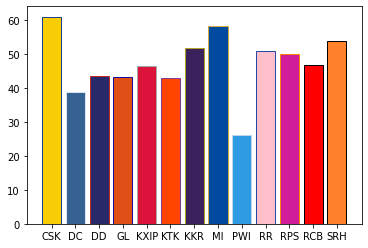

In [ ]:
plt.bar(teams_1,winning_percentage,color=cols,edgecolor=edge)

In [ ]:
consistent=next(iter((overall.items())))
print("The Most Consistent Team is: **"+consistent[0]+"** \nWith win percentage of "+str(consistent[1])+" overall.")

The Most Consistent Team is: **Chennai Super Kings** 
With win percentage of 60.98 overall.


In [ ]:
super_overs=matches[matches["result"]=="tie"]
total_super_overs_played=[]
super_overs_won=[]
for i in teams:
  total_super_overs_played.append(len(super_overs[(super_overs["team1"]==i) | (super_overs["team2"]==i)]))
  super_overs_won.append(len(super_overs[super_overs["winner"]==i]))
print(total_super_overs_played)
print(super_overs_won)

[1, 0, 2, 1, 2, 0, 3, 2, 0, 3, 0, 2, 2]
[0, 0, 1, 0, 2, 0, 0, 2, 0, 2, 0, 1, 1]


In [ ]:

#Super Over Win Percentage
super_over_percentage=[]
super_over_teams=[]
super_over_abb=[]
super_over_cols=[]
super_over_edge=[]
for i in range(len(teams)):
  if total_super_overs_played[i]!=0:
    super_over_percentage.append(float('{0:.4g}'.format(super_overs_won[i]*100/total_super_overs_played[i])))
    super_over_teams.append(teams[i])
    super_over_abb.append(teams_1[i])
    super_over_cols.append(cols[i])
    super_over_edge.append(edge[i])
print(super_over_percentage)

[0.0, 50.0, 0.0, 100.0, 0.0, 100.0, 66.67, 50.0, 50.0]


In [ ]:
#Super Over Records
super_over_records=dict(zip(super_over_teams,super_over_percentage))
super_over_records=dict(sorted(super_over_records.items(), key=lambda x: x[1], reverse=True))
print("Super Overs Winning Percentage for Teams:")
print("{:<30} {:<30}".format('TEAM', 'WIN %'))
for key, value in super_over_records.items():
  print("{:<30} {:<30}".format(key, value))

Super Overs Winning Percentage for Teams:
TEAM                           WIN %                         
Kings XI Punjab                100.0                         
Mumbai Indians                 100.0                         
Rajasthan Royals               66.67                         
Delhi Daredevils               50.0                          
Royal Challengers Bangalore    50.0                          
SunRisers Hyderabad            50.0                          
Chennai Super Kings            0.0                           
Gujarat Lions                  0.0                           
Kolkata Knight Riders          0.0                           


<BarContainer object of 9 artists>

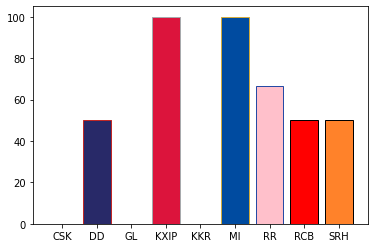

In [ ]:
plt.bar(super_over_abb,super_over_percentage,color=super_over_cols,edgecolor=super_over_edge)

In [ ]:
sup=[]
for i in range(len(super_over_percentage)):
  if super_over_percentage[i]==100:
    sup.append(super_over_teams[i])
print("Two teams have "+str(max(super_over_percentage))+"% win ratio in super overs.\nThey are: "+str(sup[0])+" and "+str(sup[1])+".")

Two teams have 100.0% win ratio in super overs.
They are: Kings XI Punjab and Mumbai Indians.


In [ ]:
#Count number of Home Matches Won
home_matches_won=[]
for i in teams:
  df_i=matches[matches["team1"]==i]
  home_matches_won.append(df_i["winner"].str.count(i).sum())
print(home_matches_won)

[51, 18, 28.0, 1, 38, 2, 34, 58, 6, 29, 5, 35.0, 30]


In [ ]:
#Home Winning Percentage
home_win_percentage=[]
for i in range(len(teams)):
  home_win_percentage.append(float('{0:.4g}'.format(home_matches_won[i]*100/home_matches_count[i])))
print(home_win_percentage)

[57.3, 41.86, 35.9, 7.143, 41.76, 28.57, 40.96, 57.43, 30.0, 43.28, 33.33, 41.18, 47.62]


In [ ]:
#Home Records
home_records=dict(zip(teams,home_win_percentage))
home_records=dict(sorted(home_records.items(), key=lambda x: x[1], reverse=True))
print("Home Winning Records for Teams:")
print("{:<30} {:<30}".format('TEAM', 'HOME WIN %'))
for key, value in home_records.items():
  print("{:<30} {:<30}".format(key, value))
     

Home Winning Records for Teams:
TEAM                           HOME WIN %                    
Mumbai Indians                 57.43                         
Chennai Super Kings            57.3                          
SunRisers Hyderabad            47.62                         
Rajasthan Royals               43.28                         
Deccan Chargers                41.86                         
Kings XI Punjab                41.76                         
Royal Challengers Bangalore    41.18                         
Kolkata Knight Riders          40.96                         
Delhi Daredevils               35.9                          
Rising Pune Supergiants        33.33                         
Pune Warriors India            30.0                          
Kochi Tuskers Kerala           28.57                         
Gujarat Lions                  7.143                         


<BarContainer object of 13 artists>

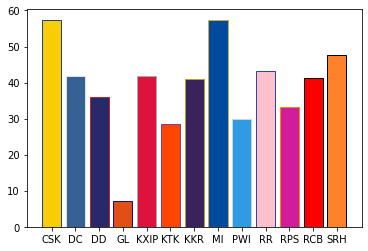

In [ ]:
plt.bar(teams_1,home_win_percentage,color=cols,edgecolor=edge)

In [ ]:
fortress=next(iter((home_records.items())))
print("Best Team at Home: **"+fortress[0]+"** \nWith win percentage of "+str(fortress[1])+" when they play at home.")

Best Team at Home: **Mumbai Indians** 
With win percentage of 57.43 when they play at home.


In [ ]:
#Count number of Away Matches Won
away_matches_won=[]
for i in teams:
  df_i=matches[matches["team2"]==i]
  away_matches_won.append(df_i["winner"].str.count(i).sum())
print(away_matches_won)
     

[49, 11, 49, 12, 44, 4, 58, 51, 6.0, 46.0, 10, 49.0, 28]


In [ ]:
#Away Winning Percentage
away_win_percentage=[]
for i in range(len(teams)):
  away_win_percentage.append(float('{0:.4g}'.format(away_matches_won[i]*100/away_matches_count[i])))
print(away_win_percentage)

[65.33, 34.38, 49.49, 75.0, 51.76, 57.14, 61.05, 59.3, 23.08, 57.5, 66.67, 51.58, 62.22]


In [ ]:
#Away Records
away_records=dict(zip(teams,away_win_percentage))
away_records=dict(sorted(away_records.items(), key=lambda x: x[1], reverse=True))
print("Away Winning Records for Teams:")
print("{:<30} {:<30}".format('TEAM', 'AWAY WIN %'))
for key, value in away_records.items():
  print("{:<30} {:<30}".format(key, value))

Away Winning Records for Teams:
TEAM                           AWAY WIN %                    
Gujarat Lions                  75.0                          
Rising Pune Supergiants        66.67                         
Chennai Super Kings            65.33                         
SunRisers Hyderabad            62.22                         
Kolkata Knight Riders          61.05                         
Mumbai Indians                 59.3                          
Rajasthan Royals               57.5                          
Kochi Tuskers Kerala           57.14                         
Kings XI Punjab                51.76                         
Royal Challengers Bangalore    51.58                         
Delhi Daredevils               49.49                         
Deccan Chargers                34.38                         
Pune Warriors India            23.08                         


<BarContainer object of 13 artists>

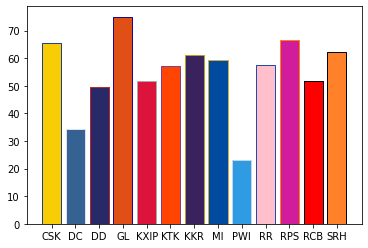

In [ ]:
plt.bar(teams_1,away_win_percentage,color=cols,edgecolor=edge)

In [ ]:
attacker=next(iter((away_records.items())))
print("Best Touring Team: **"+attacker[0]+"** \nWith win percentage of "+str(attacker[1])+" when they are the visiting team.")

Best Touring Team: **Gujarat Lions** 
With win percentage of 75.0 when they are the visiting team.


In [ ]:
#Count Number of Toss Wins
toss_wins_count=[]
toss_and_match_wins=[]
for i in teams:
  df_i=matches[matches["toss_winner"]==i]
  toss_wins_count.append(len(df_i))
  toss_and_match_wins.append(df_i["winner"].str.count(i).sum())
print(toss_wins_count)
print(toss_and_match_wins)

[89, 43, 90, 15, 81, 8, 92, 98, 20, 80, 13, 81, 46]
[57, 19, 42.0, 10, 35, 4, 53, 56, 3, 42.0, 8, 41.0, 23]


In [ ]:
#Toss Winning Percentage
toss_win_match_win_percentage=[]
for i in range(len(teams)):
  toss_win_match_win_percentage.append(float('{0:.4g}'.format(toss_and_match_wins[i]*100/toss_wins_count[i])))
print(toss_win_match_win_percentage)
     

[64.04, 44.19, 46.67, 66.67, 43.21, 50.0, 57.61, 57.14, 15.0, 52.5, 61.54, 50.62, 50.0]


In [ ]:
#Toss Win Records
toss_win_records=dict(zip(teams,toss_win_match_win_percentage))
toss_win_records=dict(sorted(toss_win_records.items(), key=lambda x: x[1], reverse=True))
print("Toss Win and Match Win Records for Teams:")
print("{:<30} {:<30}".format('TEAM', 'TOSS WIN MATCH WIN %'))
for key, value in toss_win_records.items():
  print("{:<30} {:<30}".format(key, value))

Toss Win and Match Win Records for Teams:
TEAM                           TOSS WIN MATCH WIN %          
Gujarat Lions                  66.67                         
Chennai Super Kings            64.04                         
Rising Pune Supergiants        61.54                         
Kolkata Knight Riders          57.61                         
Mumbai Indians                 57.14                         
Rajasthan Royals               52.5                          
Royal Challengers Bangalore    50.62                         
Kochi Tuskers Kerala           50.0                          
SunRisers Hyderabad            50.0                          
Delhi Daredevils               46.67                         
Deccan Chargers                44.19                         
Kings XI Punjab                43.21                         
Pune Warriors India            15.0                          


<BarContainer object of 13 artists>

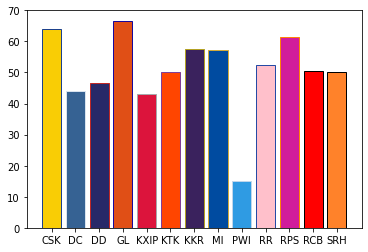

In [ ]:
plt.bar(teams_1,toss_win_match_win_percentage,color=cols,edgecolor=edge)

In [ ]:
win_toss=next(iter((toss_win_records.items())))
print("The team which is most likely to win if they win the toss is: **"+win_toss[0]+"**\nWith a win percentage of "+str(win_toss[1])+" when they win the toss")

The team which is most likely to win if they win the toss is: **Gujarat Lions**
With a win percentage of 66.67 when they win the toss


In [ ]:
#Count Number of Toss Loss
toss_loss_count=[0]*len(teams)
toss_loss_and_match_wins=[0]*len(teams)
for i in range(len(teams)):
  toss_loss_count[i]=total_matches[i]-toss_wins_count[i]
  toss_loss_and_match_wins[i]=won_matches_count[i]-toss_and_match_wins[i]
print(toss_loss_count)
print(toss_loss_and_match_wins)

[75, 32, 87, 15, 95, 6, 86, 89, 26, 67, 17, 99, 62]
[43.0, 10.0, 35.0, 3.0, 47.0, 2.0, 39.0, 53.0, 9.0, 33.0, 7.0, 43.0, 35.0]


In [ ]:
#Toss Lost and Match Win Percentage
toss_loss_match_win_percentage=[]
for i in range(len(teams)):
  toss_loss_match_win_percentage.append(float('{0:.4g}'.format(toss_loss_and_match_wins[i]*100/toss_loss_count[i])))
print(toss_loss_match_win_percentage)

[57.33, 31.25, 40.23, 20.0, 49.47, 33.33, 45.35, 59.55, 34.62, 49.25, 41.18, 43.43, 56.45]


In [ ]:
#Toss Loss Records
toss_loss_records=dict(zip(teams,toss_loss_match_win_percentage))
toss_loss_records=dict(sorted(toss_loss_records.items(), key=lambda x: x[1], reverse=True))
print("Toss Loss but Match Win Records for Teams:")
print("{:<30} {:<30}".format('TEAM', 'TOSS LOSS MATCH WIN %'))
for key, value in toss_loss_records.items():
  print("{:<30} {:<30}".format(key, value))

Toss Loss but Match Win Records for Teams:
TEAM                           TOSS LOSS MATCH WIN %         
Mumbai Indians                 59.55                         
Chennai Super Kings            57.33                         
SunRisers Hyderabad            56.45                         
Kings XI Punjab                49.47                         
Rajasthan Royals               49.25                         
Kolkata Knight Riders          45.35                         
Royal Challengers Bangalore    43.43                         
Rising Pune Supergiants        41.18                         
Delhi Daredevils               40.23                         
Pune Warriors India            34.62                         
Kochi Tuskers Kerala           33.33                         
Deccan Chargers                31.25                         
Gujarat Lions                  20.0                          


<BarContainer object of 13 artists>

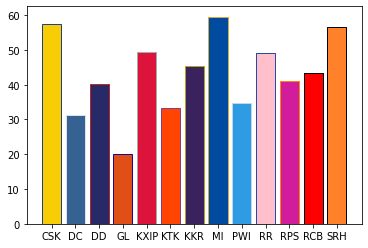

In [ ]:
plt.bar(teams_1, toss_loss_match_win_percentage,color=cols,edgecolor=edge)

In [ ]:
lose_toss=next(iter((toss_loss_records.items())))
print("The team which is most likely to win if they win the toss is: **"+lose_toss[0]+"**\nWith a win percentage of "+str(lose_toss[1])+" when they lose the toss.")
     

The team which is most likely to win if they win the toss is: **Mumbai Indians**
With a win percentage of 59.55 when they lose the toss.


In [ ]:
#Count Number of First Batting Instances
total_bat_first_count=[]
bat_first_wins=[]
for i in teams:
  df_team=matches[(matches["team1"]==i) | (matches["team2"]==i)]
  df_i=df_team[((df_team["toss_winner"]==i) & (df_team["toss_decision"]=="bat"))] 
  df_j=df_team[((df_team["toss_winner"]!=i) & (df_team["toss_decision"]=="field"))]
  total_bat_first_count.append(len(df_i)+len(df_j))
  bat_first_wins.append(int(df_i["winner"].str.count(i).sum()+(df_j["winner"].str.count(i).sum())))
print(total_bat_first_count)
print(bat_first_wins)

[89, 43, 78, 14, 91, 7, 83, 101, 20, 67, 15, 85, 63]
[51, 18, 28, 1, 38, 2, 34, 58, 6, 29, 5, 35, 30]


In [ ]:
#Batting First and Winning Percentage
bat_first_match_win_percentage=[]
for i in range(len(teams)):
  bat_first_match_win_percentage.append(float('{0:.4g}'.format(bat_first_wins[i]*100/total_bat_first_count[i])))
print(bat_first_match_win_percentage)

[57.3, 41.86, 35.9, 7.143, 41.76, 28.57, 40.96, 57.43, 30.0, 43.28, 33.33, 41.18, 47.62]


In [ ]:

#Batting First Records
bat_first_records=dict(zip(teams,bat_first_match_win_percentage))
bat_first_records=dict(sorted(bat_first_records.items(), key=lambda x: x[1], reverse=True))
print("Batting First Win Records for Teams:")
print("{:<30} {:<30}".format('TEAM', 'BAT FIRST MATCH WIN %'))
for key, value in bat_first_records.items():
  print("{:<30} {:<30}".format(key, value))

Batting First Win Records for Teams:
TEAM                           BAT FIRST MATCH WIN %         
Mumbai Indians                 57.43                         
Chennai Super Kings            57.3                          
SunRisers Hyderabad            47.62                         
Rajasthan Royals               43.28                         
Deccan Chargers                41.86                         
Kings XI Punjab                41.76                         
Royal Challengers Bangalore    41.18                         
Kolkata Knight Riders          40.96                         
Delhi Daredevils               35.9                          
Rising Pune Supergiants        33.33                         
Pune Warriors India            30.0                          
Kochi Tuskers Kerala           28.57                         
Gujarat Lions                  7.143                         


<BarContainer object of 13 artists>

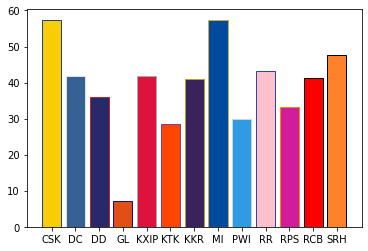

In [ ]:
plt.bar(teams_1,bat_first_match_win_percentage,color=cols,edgecolor=edge)

In [ ]:
bat_first=next(iter((bat_first_records.items())))
print("The Best Target Defending Team is: **"+bat_first[0]+"**\nWith a win percentage of "+str(bat_first[1])+" when they bat first.")

The Best Target Defending Team is: **Mumbai Indians**
With a win percentage of 57.43 when they bat first.


In [ ]:
#Count Number of Second Batting Instances
total_bat_second_count=[]
bat_second_wins=[]
for i in teams:
  df_team=matches[(matches["team1"]==i) | (matches["team2"]==i)]
  df_i=df_team[((df_team["toss_winner"]==i) & (df_team["toss_decision"]=="field"))]
  df_j=df_team[((df_team["toss_winner"]!=i) & (df_team["toss_decision"]=="bat"))]
  total_bat_second_count.append(len(df_i)+len(df_j))
  bat_second_wins.append(int(df_i["winner"].str.count(i).sum()+(df_j["winner"].str.count(i).sum())))
print(total_bat_second_count)
print(bat_second_wins)

[75, 32, 99, 16, 85, 7, 95, 86, 26, 80, 15, 95, 45]
[49, 11, 49, 12, 44, 4, 58, 51, 6, 46, 10, 49, 28]


In [ ]:

#Batting Second and Winning Percentage
bat_second_match_win_percentage=[]
for i in range(len(teams)):
  bat_second_match_win_percentage.append(float('{0:.4g}'.format(bat_second_wins[i]*100/total_bat_second_count[i])))
print(bat_second_match_win_percentage)

[65.33, 34.38, 49.49, 75.0, 51.76, 57.14, 61.05, 59.3, 23.08, 57.5, 66.67, 51.58, 62.22]


In [ ]:
#Batting Second Records
bat_second_records=dict(zip(teams,bat_second_match_win_percentage))
bat_second_records=dict(sorted(bat_second_records.items(), key=lambda x: x[1], reverse=True))
print("Batting Second Win Records for Teams:")
print("{:<30} {:<30}".format('TEAM', 'BAT SECOND MATCH WIN %'))
for key, value in bat_second_records.items():
  print("{:<30} {:<30}".format(key, value))

Batting Second Win Records for Teams:
TEAM                           BAT SECOND MATCH WIN %        
Gujarat Lions                  75.0                          
Rising Pune Supergiants        66.67                         
Chennai Super Kings            65.33                         
SunRisers Hyderabad            62.22                         
Kolkata Knight Riders          61.05                         
Mumbai Indians                 59.3                          
Rajasthan Royals               57.5                          
Kochi Tuskers Kerala           57.14                         
Kings XI Punjab                51.76                         
Royal Challengers Bangalore    51.58                         
Delhi Daredevils               49.49                         
Deccan Chargers                34.38                         
Pune Warriors India            23.08                         


<BarContainer object of 13 artists>

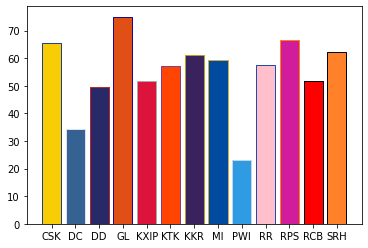

In [ ]:
plt.bar(teams_1,bat_second_match_win_percentage,color=cols,edgecolor=edge)

In [ ]:
bat_second=next(iter((bat_second_records.items())))
print("The Best Chasing Team is: **"+bat_second[0]+"**\nWith a win percentage of "+str(bat_second[1])+" when they chase a target.")

The Best Chasing Team is: **Gujarat Lions**
With a win percentage of 75.0 when they chase a target.


In [ ]:
#Stats of players only during overs 1-20 is considered during their IPL careers
deliveries=all_deliveries[(all_deliveries["inning"]==1) | (all_deliveries["inning"]==2)]

In [ ]:
#Total Batsmen
batsmen=deliveries["batsman"].unique()
print("Total Number of Batsmen: ",len(batsmen))
     

Total Number of Batsmen:  516


In [ ]:
#Total Batsmen
bowlers=deliveries["bowler"].unique()
print("Total Number of Bowlers: ",len(bowlers))

Total Number of Bowlers:  405


In [ ]:
#Total Balls faced by all Batsmen
balls_batted=[]
for i in batsmen:
  balls_batted.append([deliveries["batsman"].str.count(i).sum(),i])

In [ ]:
#Total Runs scored by Top Batsmen
balls_batted.sort(reverse=True)
best_batsmen=balls_batted[0:25]
high_runs=[]
for i in best_batsmen:
  df_i=deliveries[deliveries["batsman"]==i[1]]
  high_runs.append([df_i["batsman_runs"].sum(),i[1]])

In [ ]:
#Highest Runs List
high_runs.sort(reverse=True)
high_runs=high_runs[0:10]
high_runs_batsmen=[]
runs_scored=[]
print("Highest Run Scorers in IPL from 2008-2019:")
for i in high_runs:
  high_runs_batsmen.append(i[1])
  runs_scored.append(i[0])
  print(i)

Highest Run Scorers in IPL from 2008-2019:
[5429, 'V Kohli']
[5407, 'SK Raina']
[4914, 'RG Sharma']
[4741, 'DA Warner']
[4632, 'S Dhawan']
[4535, 'CH Gayle']
[4477, 'MS Dhoni']
[4444, 'RV Uthappa']
[4415, 'AB de Villiers']
[4223, 'G Gambhir']


<BarContainer object of 10 artists>

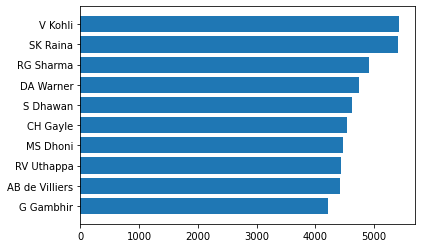

In [ ]:
plt.barh(high_runs_batsmen[::-1], runs_scored[::-1])

In [ ]:
print("The Highest Run Scorer in IPL till 2019 is: "+str(high_runs[0][1])+" with "+str(high_runs[0][0])+" runs.")

The Highest Run Scorer in IPL till 2019 is: V Kohli with 5429 runs.


In [ ]:
#Total Balls bowled by All Bowlers
balls_bowled=[]
for i in bowlers:
  balls_bowled.append([deliveries["bowler"].str.count(i).sum(),i])
     

In [ ]:
#Total Wickets taken by Top Bowlers
balls_bowled.sort(reverse=True)
best_bowlers=balls_bowled[0:25]
bowler_deliveries=deliveries[(deliveries["dismissal_kind"]=="caught") | (deliveries["dismissal_kind"]=="bowled") 
| (deliveries["dismissal_kind"]=="lbw") | (deliveries["dismissal_kind"]=="stumped") 
| (deliveries["dismissal_kind"]=="caught and bowled") | (deliveries["dismissal_kind"]=="hit wicket")]
high_wickets=[]
for i in best_bowlers:
  df_i=bowler_deliveries[bowler_deliveries["bowler"]==i[1]]
  high_wickets.append([df_i["dismissal_kind"].count().sum(),i[1]])

In [ ]:
#Highest Wickets List
high_wickets.sort(reverse=True)
high_wickets=high_wickets[0:10]
high_wickets_bowlers=[]
wickets_taken=[]
print("Highest Wicket Takers in IPL from 2008-2019:")
for i in high_wickets:
  high_wickets_bowlers.append(i[1])
  wickets_taken.append(i[0])
  print(i)

Highest Wicket Takers in IPL from 2008-2019:
[170, 'SL Malinga']
[156, 'A Mishra']
[150, 'Harbhajan Singh']
[149, 'PP Chawla']
[147, 'DJ Bravo']
[133, 'B Kumar']
[125, 'R Ashwin']
[122, 'SP Narine']
[119, 'UT Yadav']
[108, 'RA Jadeja']


<BarContainer object of 10 artists>

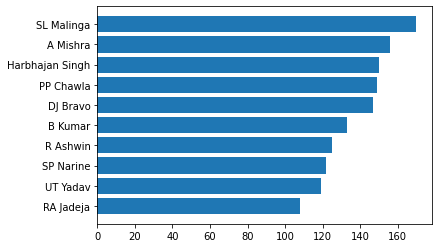

In [ ]:
plt.barh(high_wickets_bowlers[::-1],wickets_taken[::-1])

In [ ]:
print("The Highest Wicket Taker in IPL till 2019 is: "+str(high_wickets[0][1])+" with "+str(high_wickets[0][0])+" wickets.")
     

The Highest Wicket Taker in IPL till 2019 is: SL Malinga with 170 wickets.


In [ ]:
#Total Number of Wicket Keepers
stumping_records=deliveries[deliveries["dismissal_kind"]=="stumped"]
keepers=stumping_records["fielder"].unique()
keepers=keepers.tolist()
keepers=[a for a in keepers if (isinstance(a,str))]
print("Total Number of Wicket Keepers: ",len(keepers))
print(keepers)

Total Number of Wicket Keepers:  35
['RR Pant', 'MS Dhoni', 'RV Uthappa', 'WP Saha', 'KM Jadhav', 'PA Patel', 'Vishnu Vinod', 'MV Boucher', 'Kamran Akmal', 'SP Goswami', 'YV Takawale', 'AC Gilchrist', 'KD Karthik', 'PR Shah', 'M Rawat', 'NV Ojha', 'KC Sangakkara', 'AP Tare', 'AT Rayudu', 'AB de Villiers', 'DJ Jacobs', 'MS Bisla', 'DH Yagnik', 'KH Devdhar', 'N Saini', 'BB McCullum', 'KB Arun Karthik', 'Q de Kock', 'Gurkeerat Singh', 'CM Gautam', 'SV Samson', 'KL Rahul', 'Ishan Kishan', 'H Klaasen', 'J Bairstow']


In [ ]:
#Dismissal Records for Wicket Keepers
catch_records=deliveries[(deliveries["dismissal_kind"]=="caught") | (deliveries["dismissal_kind"]=="run out")]
keeping_total=[]
for i in range(len(keepers)):
  keeping_total.append([int((stumping_records["fielder"].str.count(str(keepers[i])).sum())+(catch_records["fielder"].str.count(str(keepers[i])).sum())),keepers[i]])
print("The Best Wicket-Keepers are: ")
keeping_total.sort(reverse=True)
best_keepers=keeping_total[0:10]
best_keeps=[]
keeps_total=[]
for i in best_keepers:
  keeps_total.append(i[0])
  best_keeps.append(i[1])
  print(i)

The Best Wicket-Keepers are: 
[159, 'MS Dhoni']
[152, 'KD Karthik']
[125, 'RV Uthappa']
[116, 'AB de Villiers']
[97, 'PA Patel']
[83, 'WP Saha']
[82, 'NV Ojha']
[75, 'AC Gilchrist']
[65, 'AT Rayudu']
[58, 'KC Sangakkara']


<BarContainer object of 10 artists>

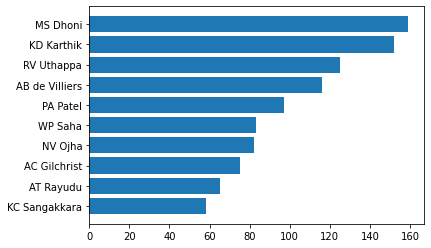

In [ ]:
plt.barh(best_keeps[::-1],keeps_total[::-1])
     

In [ ]:
print("The Best Wicket-Keeper in IPL till 2019 is: "+str(best_keepers[0][1])+" with "+str(best_keepers[0][0])+" dismissals.")
     

The Best Wicket-Keeper in IPL till 2019 is: MS Dhoni with 159 dismissals.


In [ ]:
#Total Number of Fielders:
fielders=catch_records["fielder"].unique()
fielders=[a for a in fielders if (isinstance(a,str))]
for i in range(len(fielders)):
  if fielders[i].endswith("(sub)"):
    fielders[i]=fielders[i][:-6]
fielders=list(set(fielders))
fielders=[x for x in fielders if x not in keepers]
print("Total Number of Fielders: ",len(fielders))

Total Number of Fielders:  417


In [ ]:
#Catching Records for Fielders
catches_total=[]
for i in fielders:
  catches_total.append([int(catch_records["fielder"].str.contains(str(i)).sum()),i])
print("The Best Fielders are: ")
catches_total.sort(reverse=True)
best_fielders=catches_total[0:10]
best_fielders_1=[]
catches=[]
for i in best_fielders:
  catches.append(i[0])
  best_fielders_1.append(i[1])
  print(i)

The Best Fielders are: 
[115, 'SK Raina']
[92, 'RG Sharma']
[90, 'V Kohli']
[85, 'KA Pollard']
[81, 'RA Jadeja']
[78, 'DJ Bravo']
[77, 'MK Pandey']
[74, 'S Dhawan']
[65, 'DA Warner']
[64, 'AM Rahane']


<BarContainer object of 10 artists>

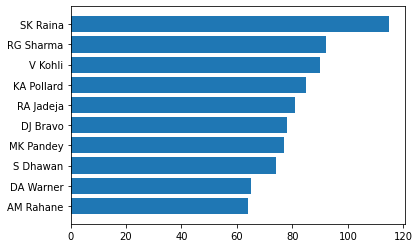

In [ ]:
plt.barh(best_fielders_1[::-1],catches[::-1])

In [ ]:
print("The Best Fielder in IPL till 2019 is: "+str(best_fielders[0][1])+" with "+str(best_fielders[0][0])+" dismissals.")

The Best Fielder in IPL till 2019 is: SK Raina with 115 dismissals.


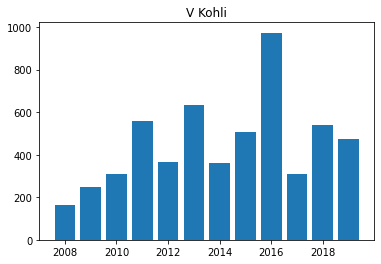

In [ ]:
#Calculating Batsman Stats for Each Year 
years=[2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
runs_per_year=[0]*12
batsman="V Kohli" #Enter batsman name here
bats_stats=deliveries[deliveries["batsman"]==batsman]
matches_batted=bats_stats["match_id"].unique()
match_runs=[]
for i in matches_batted:
  df_i=bats_stats[bats_stats["match_id"]==i]
  season_row=matches[matches["id"]==i]
  season=season_row.iloc[0]['season']
  season%=2008
  runs_per_year[season]+=df_i["batsman_runs"].sum()
plt.figure()
plt.title(batsman)
plt.bar(years,runs_per_year)
plt.show()

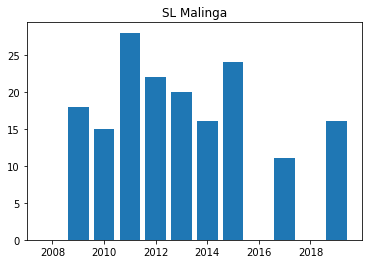

In [ ]:
#Calculating Bowler Stats for Each Year
wickets_per_year=[0]*12
bowler="SL Malinga" #Enter bowler name here
bowler_stats=bowler_deliveries[bowler_deliveries["bowler"]==bowler]
matches_bowled=bowler_stats["match_id"].unique()
match_wickets=[]
for i in matches_bowled:
  df_i=bowler_stats[bowler_stats["match_id"]==i]
  season_row=matches[matches["id"]==i]
  season=season_row.iloc[0]['season']
  season%=2008
  wickets_per_year[season]+=len(df_i)
plt.figure()
plt.title(bowler)
plt.bar(years,wickets_per_year)
plt.show()

In [ ]:
#Considering that we are a company that wants teams to endorse products
teams_eight=["Chennai Super Kings","Delhi Capitals","Kings XI Punjab","Kolkata Knight Riders","Mumbai Indians","Rajasthan Royals","Royal Challengers Bangalore","Sunrisers Hyderabad"]
endorse_teams=[]
endorse_teams.append(successful[0])
endorse_teams.append(consistent[0])
endorse_teams.append(fortress[0])
endorse_teams.append(attacker[0])
endorse_teams.append(win_toss[0])
endorse_teams.append(lose_toss[0])
endorse_teams=list(set(endorse_teams))
endorse_teams=[x for x in endorse_teams if x in teams_eight]

In [ ]:
#Considering that we are a company that wants players to endorse products
endorse_players=[]
for i in range(0,5):
  endorse_players.append(high_runs_batsmen[i])
for i in range(0,5):
  endorse_players.append(high_wickets_bowlers[i])
for i in range(0,5):
  endorse_players.append(best_keeps[i])
for i in range(0,5):
  endorse_players.append(best_fielders_1[i])
endorse_players=list(set(endorse_players))
     

In [ ]:
print("The Best Teams for endorsing products are: ")
for i in endorse_teams:
  print(i)
print("\nThe Best Players for endorsing products are: ")
endorse_players.sort()
for i in endorse_players:
  print(i)
     

The Best Teams for endorsing products are: 
Mumbai Indians
Chennai Super Kings

The Best Players for endorsing products are: 
A Mishra
AB de Villiers
DA Warner
DJ Bravo
Harbhajan Singh
KA Pollard
KD Karthik
MS Dhoni
PA Patel
PP Chawla
RA Jadeja
RG Sharma
RV Uthappa
S Dhawan
SK Raina
SL Malinga
V Kohli
